In [1]:
import os
import praw
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [2]:
reddit = praw.Reddit(
 client_id=os.environ.get("REDDIT_CLIENT_ID"),
 client_secret=os.environ.get("REDDIT_CLIENT_SECRET"),
 user_agent=os.environ.get("REDDIT_USER_AGENT"),
)

In [15]:
headlines = set()
for submission in reddit.subreddit("hiphopheads").hot(limit=None):
    if ("FRESH" in submission.title || "FIRST" in submission.title):
        headlines.add(submission.title)

In [16]:
hhh_df = pd.DataFrame(headlines)
hhh_df.columns = ['Titles']
hhh_df.head()

,Titles
0,[FIRST IMPRESSIONS] Rick Ross and Meek Mill - ...
1,[FIRST IMPRESSIONS] Kevin Abstract - Blanket
2,The Kid LAROI is releasing his debut studio al...


In [17]:
hhh_df.Titles.duplicated().sum() # Duplicate count for Title
#Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub(r'@[A-Za-z0–9]+', '', text) #Remove @mentions replace with blank
 text = re.sub(r'#', '', text) #Remove the ‘#’ symbol, replace with blank
 text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
 text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
 text = re.sub(r':', '', text) # Remove :
 return text
#Cleaning the text
hhh_df["Titles"]= hhh_df["Titles"].apply(cleanTxt)
#Show the clean text
hhh_df.head()

,Titles
0,[FIRST IMPRESSIONS] Rick Ross and Meek Mill - ...
1,[FIRST IMPRESSIONS] Kevin Abstract - Blanket
2,The Kid LAROI is releasing his debut studio al...


In [18]:
#Next we have to remove emoji & Unicode from the Tweet data.
def remove_emoji(string):
 emoji_pattern = re.compile("["
 u"\U0001F600-\U0001F64F" # emoticons
 u"\U0001F300-\U0001F5FF" # symbols & pictographs
 u"\U0001F680-\U0001F6FF" # transport & map symbols
 u"\U0001F1E0-\U0001F1FF" # flags (iOS)
 u"\U00002500-\U00002BEF" # chinese char
 u"\U00002702-\U000027B0"
 u"\U00002702-\U000027B0"
 u"\U000024C2-\U0001F251"
 u"\U0001f926-\U0001f937"
 u"\U00010000-\U0010ffff"
 u"\u2640-\u2642"
 u"\u2600-\u2B55"
 u"\u200d"
 u"\u23cf"
 u"\u23e9"
 u"\u231a"
 u"\ufe0f" # dingbats
 u"\u3030"
 "]+", flags=re.UNICODE)
 return emoji_pattern.sub(r'', string)
#Cleaning the text
hhh_df["Titles"]= hhh_df["Titles"].apply(remove_emoji)
#Show the clean text
hhh_df.head()

,Titles
0,[FIRST IMPRESSIONS] Rick Ross and Meek Mill - ...
1,[FIRST IMPRESSIONS] Kevin Abstract - Blanket
2,The Kid LAROI is releasing his debut studio al...


In [19]:
#import sys
#sys.path.append('../Community-Sentiment-Album/venv/Lib/site-packages/')
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [20]:
#Create a function to get the subjectivity
def getSubjectivity(text):
 return TextBlob(text).sentiment.subjectivity
#Create a function to get Polarity
def getPolarity(text):
 return TextBlob(text).sentiment.polarity
#Now we create a new column for what we just did and add it to the Tweet_df dataframe
hhh_df['Subjectivity'] = hhh_df['Titles'].apply(getSubjectivity)
hhh_df['Polarity'] = hhh_df['Titles'].apply(getPolarity)
#Now display data
hhh_df.head()

,Titles,Subjectivity,Polarity
0,[FIRST IMPRESSIONS] Rick Ross and Meek Mill - ...,0.527778,0.433333
1,[FIRST IMPRESSIONS] Kevin Abstract - Blanket,0.333333,0.250000
2,The Kid LAROI is releasing his debut studio al...,0.302083,0.187500


In [21]:
#Group the range of Polarity into different categories
def getInsight(score):
 if score < 0:
     return "Negative"
 elif score == 0:
     return "Neutral"
 else:
     return "Positive"
hhh_df["Insight"] = hhh_df["Polarity"].apply(getInsight)
hhh_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,[FIRST IMPRESSIONS] Rick Ross and Meek Mill - ...,0.527778,0.433333,Positive
1,[FIRST IMPRESSIONS] Kevin Abstract - Blanket,0.333333,0.250000,Positive
2,The Kid LAROI is releasing his debut studio al...,0.302083,0.187500,Positive


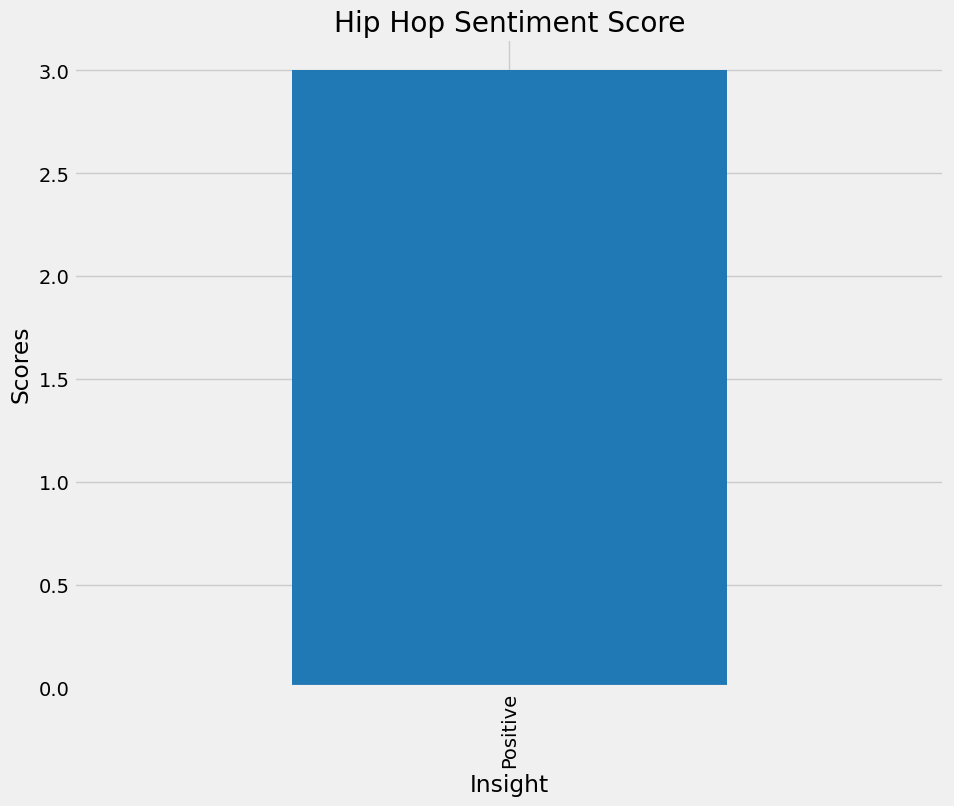

In [22]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("Hip Hop Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
hhh_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

In [25]:
posts = set()
for submission in reddit.subreddit("fantanoforever").search("new album"):
    posts.add(submission.title)


In [26]:
fan_df = pd.DataFrame(posts)
fan_df.columns = ['Titles']
fan_df.head()

,Titles
0,What are your thoughts on the new blink-182 al...
1,Thoughts on this new HMLTD album?
2,Jesse Wares New Album comes out next week Friday
3,Are we excited for the new Bad Bunny album?
4,JIK new album cover


In [27]:
fan_df['Subjectivity'] = fan_df['Titles'].apply(getSubjectivity)
fan_df['Polarity'] = fan_df['Titles'].apply(getPolarity)
#Now display data
fan_df["Insight"] = fan_df["Polarity"].apply(getInsight)
fan_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,What are your thoughts on the new blink-182 al...,0.454545,0.136364,Positive
1,Thoughts on this new HMLTD album?,0.454545,0.136364,Positive
2,Jesse Wares New Album comes out next week Friday,0.227273,0.068182,Positive
3,Are we excited for the new Bad Bunny album?,0.623737,-0.062879,Negative
4,JIK new album cover,0.454545,0.136364,Positive
5,Thoughts on the New protomartyr album?,0.454545,0.136364,Positive
6,Lil Yachty new album is currently second highe...,0.227273,0.068182,Positive
7,What's your opinion on The Rolling Stones? (Ne...,0.454545,0.213068,Positive
8,anyone listens to to the graves new album,0.454545,0.136364,Positive
9,NEW LIMP BIZKIT ALBUM!!!!!,0.477273,-0.236994,Negative


In [55]:
#Extract Artist name from title to determine whose album is having sentiment analysis run.
def findArtist(title):
    if(title == None):
        return title
    reg1 = re.search("New\s(.+?)\salbum", title, flags=re.IGNORECASE)
    if reg1:
        artist = reg.group(1)
    reg2 = re.search("(.+?)new\salbum", title, flags=re.IGNORECASE)
    if (reg2):
        artist = reg2.group(1)
    if (re.match("\D", artist)):
        return(artist + "album")
    return title

In [67]:
#fan_df['Titles'] = fan_df['Titles'].apply(findArtist)
#fan_df.head(50)
#print(type(fan_df['Titles']))
#fan_df.rename(columns="bonk")

TypeError: Index(...) must be called with a collection of some kind, 'bonk' was passed